<a href="https://colab.research.google.com/github/JohnFattore/NBAFedSGD/blob/main/FederatedNBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NBA stats for training

teamList = ["Atlanta Hawks","Boston Celtics","Brooklyn Nets","Charlotte Hornets","Chicago Bulls","Cleveland Cavaliers","Dallas Mavericks","Denver Nuggets","Detroit Pistons","Golden State Warriors","Houston Rockets","Indiana Pacers","Los Angeles Clippers","Los Angeles Lakers","Memphis Grizzlies","Miami Heat","Milwaukee Bucks","Minnesota Timberwolves","New Orleans Pelicans","New York Knicks","Oklahoma City Thunder","Orlando Magic","Philadelphia 76ers","Phoenix Suns","Portland Trail Blazers","Sacramento Kings","San Antonio Spurs","Toronto Raptors","Utah Jazz","Washington Wizards"]

# 3-Point %, 3-Point Attempts, Field Goal %, Turnovers, Assists, Offensive Rebounds
seasonStats = {'Stats08-09': [[36.6, 19.9, 45.8, 12.8, 20.2, 10.6], 
[39.7, 16.5, 48.6, 15.6, 22.7, 10.6], 
[36.6, 16.3, 45.5, 15.6, 21.2, 10.8], 
[38.1, 15.8, 45.7, 14.5, 21.1, 11.8], 
[39.3, 20.4, 46.8, 12.7, 20.3, 10.8], 
[35.0, 19.9, 46.2, 12.7, 21.7, 11.1], 
[37.1, 18.0, 47.0, 15.3, 22.2, 11.0], 
[34.9, 13.2, 45.4, 11.9, 20.6, 11.6], 
[37.3, 18.0, 45.8, 14.6, 20.9, 11.6], 
[37.5, 20.2, 45.3, 14.1, 20.3, 10.5], 
[37.8, 21.0, 45.5, 14.5, 21.6, 11.3], 
[35.4, 18.5, 44.1, 14.9, 21.0, 10.9], 
[36.1, 18.5, 47.4, 13.5, 23.3, 12.4], 
[36.0, 13.5, 45.4, 15.3, 17.4, 10.3], 
[35.7, 19.9, 45.7, 12.5, 20.4, 10.1], 
[36.3, 17.2, 44.5, 14.1, 22.0, 11.9], 
[35.3, 18.8, 44.1, 14.2, 20.4, 11.9], 
[37.6, 21.2, 44.8, 13.1, 20.0, 10.4], 
[36.4, 18.6, 45.7, 12.5, 19.6, 9.8], 
[36.0, 27.9, 44.5, 14.3, 21.2, 11.1], 
[34.6, 11.6, 44.7, 16.2, 20.3, 12.2], 
[38.1, 26.2, 45.7, 13.9, 19.4, 10.0], 
[31.8, 13.1, 45.9, 14.1, 20.1, 12.7], 
[38.3, 17.6, 50.4, 15.7, 23.2, 11.0], 
[38.3, 19.0, 46.5, 12.9, 20.3, 12.9], 
[36.8, 19.4, 44.7, 15.4, 19.7, 10.2], 
[38.6, 19.8, 46.6, 11.7, 21.2, 8.9], 
[37.2, 15.7, 45.8, 13.4, 22.4, 9.8], 
[34.9, 13.7, 47.5, 14.8, 24.7, 11.5], 
[33.0, 14.6, 45.0, 14.0, 20.0, 11.7]],
'Stats09-10': [[36.0, 17.7, 46.8, 12.0, 21.8, 11.8], 
[34.8, 17.5, 48.3, 14.9, 23.5, 8.7], 
[34.6, 16.2, 45.3, 15.7, 20.2, 10.5], 
[33.0, 13.0, 45.1, 14.3, 20.8, 11.4], 
[38.1, 19.3, 48.5, 13.9, 22.4, 9.6], 
[37.2, 18.3, 46.4, 12.9, 23.4, 10.2], 
[35.9, 18.5, 46.8, 13.9, 21.0, 10.8], 
[31.4, 14.5, 44.5, 13.4, 19.4, 12.8], 
[37.5, 20.6, 46.9, 14.7, 22.4, 9.2], 
[35.1, 22.4, 44.7, 14.5, 21.8, 11.8], 
[34.8, 23.1, 44.3, 15.0, 21.1, 9.6], 
[33.2, 17.8, 45.5, 15.7, 22.1, 11.3], 
[34.1, 19.0, 45.7, 13.4, 21.1, 11.9], 
[33.7, 12.4, 46.9, 15.2, 18.8, 13.0], 
[34.6, 17.4, 45.8, 13.2, 18.9, 10.7], 
[35.6, 22.1, 43.6, 13.2, 21.2, 11.8], 
[34.1, 14.4, 44.9, 16.3, 19.8, 11.7], 
[31.8, 14.5, 42.9, 14.4, 18.8, 10.9], 
[36.3, 19.2, 46.4, 13.5, 22.3, 10.4], 
[34.6, 26.2, 45.5, 14.0, 21.6, 10.2], 
[34.0, 15.0, 46.2, 15.0, 20.0, 11.7], 
[37.5, 27.3, 47.0, 14.1, 19.7, 9.9], 
[34.3, 16.8, 46.0, 14.5, 21.0, 11.5], 
[41.2, 21.6, 49.2, 14.8, 23.3, 11.1], 
[35.4, 16.9, 46.1, 12.3, 20.4, 11.1], 
[34.9, 16.9, 45.6, 15.0, 20.5, 11.9], 
[35.8, 18.9, 47.3, 13.6, 22.3, 10.8], 
[37.1, 17.0, 48.2, 13.4, 22.0, 9.8], 
[36.4, 14.7, 49.1, 15.2, 26.7, 10.6], 
[35.3, 14.9, 44.9, 14.9, 19.0, 11.8]],
'Stats10-11': [[35.2, 17.4, 46.2, 13.6, 22.0, 9.3], 
[36.5, 13.6, 48.6, 14.6, 23.4, 7.8], 
[32.7, 14.7, 45.1, 14.5, 21.1, 10.3], 
[36.1, 17.3, 46.2, 14.2, 22.3, 11.8], 
[34.2, 18.2, 43.4, 14.2, 21.0, 10.4], 
[36.5, 21.6, 47.5, 14.0, 23.8, 9.5], 
[38.8, 20.8, 47.6, 14.1, 22.1, 9.6], 
[37.6, 15.3, 46.0, 13.0, 21.1, 11.4], 
[39.2, 21.3, 46.1, 14.6, 22.5, 11.6], 
[36.7, 22.5, 45.4, 13.5, 23.8, 11.7], 
[35.4, 20.2, 44.2, 15.4, 19.6, 11.1], 
[33.8, 18.5, 45.7, 16.4, 22.1, 11.6], 
[35.2, 18.1, 46.3, 13.1, 22.0, 12.1], 
[33.4, 11.3, 47.1, 14.0, 20.6, 11.8], 
[37.0, 18.0, 48.1, 13.9, 20.0, 9.6], 
[34.2, 17.2, 43.0, 13.5, 18.8, 10.5], 
[37.6, 19.1, 44.1, 17.0, 20.1, 13.2], 
[34.3, 16.3, 44.0, 14.0, 21.0, 11.1], 
[36.0, 15.0, 45.9, 13.0, 20.6, 10.0], 
[36.8, 25.4, 45.7, 13.7, 21.4, 10.3], 
[34.7, 17.1, 46.4, 14.1, 20.4, 11.0], 
[36.6, 25.6, 46.1, 14.9, 20.0, 10.5], 
[35.5, 15.2, 46.1, 13.0, 22.7, 10.4], 
[37.7, 22.6, 47.0, 14.3, 23.7, 10.0], 
[34.5, 18.3, 44.7, 13.0, 21.2, 12.1], 
[33.5, 15.6, 44.9, 16.1, 20.4, 13.1], 
[39.7, 21.1, 47.5, 13.4, 22.4, 10.1], 
[31.6, 13.3, 46.5, 14.7, 21.9, 11.7], 
[34.6, 15.3, 46.5, 14.3, 23.4, 11.0], 
[33.2, 14.4, 44.3, 15.3, 19.4, 12.4]],
'Stats12-13': [[37.1, 23.2, 46.4, 14.9, 24.5, 9.2], 
[35.8, 17.2, 46.5, 14.6, 22.8, 8.1], 
[35.7, 21.5, 45.0, 14.7, 20.3, 12.8], 
[33.5, 17.1, 42.5, 14.1, 19.4, 11.2], 
[35.3, 15.4, 43.7, 14.3, 23.0, 12.5], 
[34.6, 19.3, 43.4, 14.0, 20.7, 12.2], 
[37.2, 19.9, 46.2, 14.0, 23.2, 9.4], 
[34.3, 18.5, 47.8, 15.3, 24.4, 13.3], 
[35.6, 17.6, 44.9, 15.1, 21.2, 12.1], 
[40.3, 19.9, 45.8, 15.1, 22.5, 10.8], 
[36.6, 28.9, 46.1, 16.4, 23.2, 11.1], 
[34.7, 19.7, 43.6, 15.1, 20.3, 12.9], 
[35.8, 21.4, 47.8, 14.6, 23.9, 11.4], 
[35.5, 24.6, 45.8, 15.0, 22.2, 11.5], 
[34.5, 13.5, 44.4, 14.0, 20.9, 12.9], 
[39.6, 22.1, 49.6, 13.9, 23.0, 8.2], 
[36.0, 20.4, 43.5, 14.1, 22.9, 13.0], 
[30.5, 18.0, 43.9, 14.8, 22.4, 11.9], 
[36.3, 18.0, 44.8, 14.5, 21.0, 12.0], 
[37.6, 28.9, 44.8, 12.0, 19.3, 10.9], 
[37.7, 19.4, 48.1, 15.3, 21.4, 10.4], 
[32.9, 18.7, 44.8, 14.5, 22.8, 10.9], 
[36.0, 17.5, 44.4, 13.0, 22.8, 10.9], 
[33.0, 17.7, 44.3, 15.6, 22.6, 11.7], 
[35.3, 23.2, 44.8, 14.7, 21.8, 10.7], 
[36.3, 20.5, 44.7, 14.6, 20.8, 11.5], 
[37.6, 21.5, 48.1, 14.7, 25.1, 8.1], 
[34.3, 20.3, 44.6, 13.7, 21.5, 10.6], 
[36.6, 16.9, 45.4, 14.8, 22.7, 12.1], 
[36.5, 18.2, 43.5, 15.1, 21.6, 10.8]],
'Stats13-14': [[36.3, 25.8, 45.8, 15.3, 24.9, 8.7], 
[33.3, 21.1, 43.5, 15.4, 21.0, 12.0], 
[36.9, 23.4, 45.9, 14.5, 20.9, 8.8], 
[35.1, 17.9, 44.2, 12.3, 21.7, 9.5], 
[34.8, 17.8, 43.2, 14.9, 22.7, 11.4], 
[35.6, 20.0, 43.7, 14.2, 21.2, 12.1], 
[38.4, 22.9, 47.4, 13.5, 23.6, 10.2], 
[35.8, 23.9, 44.7, 15.9, 22.4, 12.3], 
[32.1, 19.3, 44.7, 14.5, 20.9, 14.6], 
[38.0, 24.8, 46.2, 15.2, 23.3, 10.9], 
[35.8, 26.6, 47.2, 16.1, 21.4, 11.2], 
[35.7, 18.8, 44.9, 15.1, 20.1, 10.2], 
[35.2, 24.0, 47.4, 13.9, 24.6, 10.5], 
[38.1, 24.8, 45.0, 15.1, 24.5, 9.1], 
[35.3, 14.0, 46.4, 13.7, 21.9, 11.6], 
[36.4, 22.3, 50.1, 14.8, 22.5, 7.6], 
[35.3, 18.9, 43.8, 15.1, 21.5, 11.8], 
[34.1, 21.4, 44.4, 13.9, 23.9, 12.5], 
[37.3, 15.9, 45.9, 13.8, 21.3, 11.4], 
[37.2, 24.9, 44.9, 13.0, 20.0, 10.6], 
[36.1, 22.4, 47.1, 15.3, 21.9, 10.8], 
[35.3, 19.5, 44.5, 14.9, 21.0, 9.7], 
[31.2, 22.5, 43.5, 16.9, 21.8, 11.6], 
[37.2, 25.1, 46.3, 15.3, 19.1, 11.3], 
[37.2, 25.3, 45.0, 13.7, 23.2, 12.5], 
[33.3, 18.0, 44.7, 15.2, 18.9, 12.1], 
[39.7, 21.4, 48.6, 14.4, 25.2, 9.3], 
[37.2, 23.4, 44.5, 14.1, 21.2, 11.4], 
[34.4, 19.2, 44.4, 14.6, 20.3, 11.0], 
[38.0, 20.8, 45.9, 14.7, 23.3, 10.8]],
'Stats14-15': [[38.0, 26.2, 46.6, 14.2, 25.7, 8.7], 
[32.7, 24.6, 44.3, 13.8, 24.5, 11.1], 
[33.1, 19.9, 45.1, 13.8, 20.9, 10.3], 
[31.8, 19.1, 42.0, 11.9, 20.2, 10.0], 
[35.3, 22.3, 44.2, 14.0, 21.7, 11.7], 
[36.7, 27.5, 45.8, 14.3, 22.1, 11.1], 
[35.2, 25.4, 46.3, 13.0, 22.5, 10.5], 
[32.5, 24.8, 43.3, 14.2, 21.8, 12.3], 
[34.4, 24.9, 43.2, 13.4, 21.6, 12.8], 
[39.8, 27.0, 47.8, 14.5, 27.4, 10.4], 
[34.8, 32.7, 44.4, 16.7, 22.2, 11.7], 
[35.2, 21.2, 43.9, 14.0, 21.4, 10.4], 
[37.6, 26.9, 47.3, 12.3, 24.8, 9.6], 
[34.4, 18.9, 43.5, 13.2, 20.9, 11.6], 
[33.9, 15.2, 45.8, 13.3, 21.7, 10.4], 
[33.5, 20.2, 45.6, 14.8, 19.8, 9.1], 
[36.3, 18.3, 45.9, 16.7, 23.6, 10.7], 
[33.2, 14.9, 43.8, 15.0, 21.6, 11.6], 
[37.0, 19.3, 45.7, 13.3, 22.0, 11.5], 
[34.7, 19.7, 42.8, 14.7, 21.3, 10.6], 
[33.9, 22.7, 44.7, 14.7, 20.5, 12.8], 
[34.7, 19.5, 45.3, 14.9, 20.6, 10.0], 
[32.0, 26.3, 40.8, 17.7, 20.5, 11.9], 
[34.1, 25.0, 45.2, 15.1, 20.2, 10.9], 
[36.2, 27.2, 45.0, 13.6, 21.9, 10.7], 
[34.1, 16.5, 45.5, 16.3, 20.3, 10.9], 
[36.7, 22.5, 46.8, 14.0, 24.4, 9.8], 
[35.2, 25.1, 45.5, 12.9, 20.7, 10.7], 
[34.3, 21.7, 44.7, 15.3, 19.9, 12.0], 
[36.0, 16.8, 46.2, 15.0, 24.0, 10.5]], 
'Stats15-16': [[35.0, 28.4, 45.8, 15.0, 25.6, 8.3], 
[33.5, 26.1, 43.9, 13.7, 24.2, 11.6], 
[35.2, 18.4, 45.3, 14.8, 22.3, 10.5], 
[36.2, 29.4, 43.9, 12.5, 21.7, 9.0], 
[37.1, 21.4, 44.1, 13.9, 22.8, 11.1], 
[36.2, 29.6, 46.0, 13.6, 22.7, 10.6], 
[34.4, 28.6, 44.4, 12.8, 22.1, 9.2], 
[33.8, 23.7, 44.2, 14.7, 22.7, 11.5], 
[34.5, 26.2, 43.9, 13.5, 19.4, 12.5], 
[41.6, 31.6, 48.7, 15.2, 28.9, 10.0], 
[34.7, 30.9, 45.2, 15.9, 22.2, 11.3], 
[35.1, 23.0, 45.0, 14.9, 21.2, 10.3], 
[36.4, 26.7, 46.5, 13.0, 22.8, 8.8], 
[31.7, 24.6, 41.4, 13.7, 18.0, 10.7], 
[33.1, 18.5, 44.0, 13.3, 20.7, 11.2], 
[33.6, 18.0, 47.0, 14.1, 20.8, 9.8], 
[34.5, 15.6, 46.7, 15.2, 23.1, 10.5], 
[33.8, 16.4, 46.4, 15.0, 23.4, 10.0], 
[36.0, 23.8, 44.8, 13.4, 22.2, 9.5], 
[34.6, 21.5, 43.9, 13.4, 20.5, 10.4], 
[34.9, 23.7, 47.6, 15.9, 23.0, 13.1], 
[35.0, 22.2, 45.5, 14.1, 23.6, 10.3], 
[33.9, 27.5, 43.1, 16.4, 21.5, 9.5], 
[34.8, 25.8, 43.5, 17.2, 20.7, 11.5], 
[37.0, 28.5, 45.0, 14.6, 21.3, 11.6], 
[35.9, 22.4, 46.4, 16.2, 24.5, 10.6], 
[37.5, 18.5, 48.4, 13.1, 24.5, 9.4], 
[37.0, 23.4, 45.1, 13.1, 18.7, 10.2], 
[35.5, 23.9, 44.9, 14.9, 19.0, 10.7], 
[35.8, 24.2, 46.0, 14.5, 24.5, 9.1]],
'Stats16-17': [[34.1, 26.1, 45.1, 15.8, 23.6, 10.3], 
[35.9, 33.4, 45.4, 13.3, 25.2, 9.1], 
[33.8, 31.6, 44.4, 16.5, 21.4, 8.8], 
[35.1, 28.6, 44.2, 11.5, 23.1, 8.8], 
[34.0, 22.3, 44.4, 13.6, 22.6, 12.2], 
[38.4, 33.9, 47.0, 13.7, 22.7, 9.3], 
[35.5, 30.2, 44.0, 11.9, 20.8, 7.9], 
[36.8, 28.8, 46.9, 15.0, 25.3, 11.8], 
[33.0, 23.4, 44.9, 11.9, 21.1, 11.1], 
[38.3, 31.2, 49.5, 14.8, 30.4, 9.4], 
[35.7, 40.3, 46.2, 15.1, 25.2, 10.9], 
[37.6, 23.0, 46.5, 13.8, 22.5, 9.0], 
[37.5, 27.4, 47.5, 13.0, 22.5, 9.0], 
[34.6, 25.7, 45.0, 15.2, 20.9, 11.4], 
[35.4, 26.5, 43.5, 12.9, 21.3, 10.8], 
[36.5, 27.0, 45.5, 13.4, 21.2, 10.6], 
[37.0, 23.7, 47.4, 14.0, 24.2, 8.8], 
[34.9, 21.0, 46.7, 14.0, 23.7, 11.4], 
[35.0, 26.8, 45.0, 12.9, 22.8, 8.6], 
[34.8, 24.7, 44.7, 13.9, 21.8, 12.0], 
[32.7, 25.8, 45.2, 15.0, 21.0, 12.2], 
[32.8, 26.1, 44.0, 13.3, 22.2, 9.8], 
[34.0, 29.8, 44.2, 16.7, 23.8, 9.8], 
[33.2, 22.6, 45.0, 15.4, 19.6, 11.9], 
[37.5, 27.7, 45.9, 13.7, 21.1, 10.1], 
[37.6, 23.9, 46.1, 14.6, 22.5, 8.7], 
[39.1, 23.5, 46.9, 13.4, 23.8, 10.0], 
[36.3, 24.3, 46.4, 12.7, 18.5, 10.6], 
[37.2, 26.0, 46.6, 13.6, 20.1, 9.4], 
[37.2, 24.8, 47.5, 14.2, 23.9, 10.3]]}

seasonStatsTest = {'Stats17-18': [[36.0, 31.0, 44.6, 15.5, 23.7, 9.1], 
[37.7, 30.4, 45.0, 14.0, 22.5, 9.4], 
[35.6, 35.7, 44.1, 15.2, 23.7, 9.7], 
[36.9, 27.2, 45.0, 12.7, 21.6, 10.1], 
[35.5, 31.1, 43.5, 14.0, 23.5, 9.6], 
[37.2, 32.1, 47.6, 13.7, 23.4, 8.5], 
[36.0, 32.8, 44.4, 12.3, 22.7, 8.1], 
[37.1, 30.9, 47.0, 15.0, 25.1, 11.0], 
[37.3, 28.9, 45.0, 13.4, 22.8, 10.1], 
[39.1, 28.9, 50.3, 15.4, 29.3, 8.4], 
[36.2, 42.3, 46.0, 13.8, 21.5, 9.0], 
[36.9, 24.5, 47.2, 13.3, 22.2, 9.6], 
[35.4, 26.8, 47.1, 14.7, 22.3, 10.1], 
[34.5, 29.1, 46.1, 15.8, 23.8, 10.7], 
[35.2, 26.2, 44.4, 15.0, 21.5, 9.5], 
[36.0, 30.6, 45.5, 14.4, 22.7, 9.3], 
[35.5, 24.7, 47.8, 13.8, 23.2, 8.4], 
[35.7, 22.5, 47.6, 12.5, 22.7, 10.3], 
[36.2, 28.2, 48.3, 14.9, 26.8, 8.7], 
[35.2, 23.3, 46.4, 14.7, 23.3, 10.5], 
[35.4, 30.4, 45.3, 14.0, 21.3, 12.5], 
[35.1, 29.3, 45.2, 14.5, 23.4, 8.8], 
[36.9, 29.8, 47.2, 16.5, 27.1, 10.9], 
[33.4, 27.9, 44.2, 15.7, 21.3, 10.3], 
[36.6, 28.1, 45.2, 13.5, 19.5, 10.2], 
[37.5, 24.0, 45.0, 13.7, 21.6, 9.5], 
[35.2, 24.1, 45.7, 13.1, 22.8, 10.4], 
[35.8, 33.0, 47.2, 13.4, 24.3, 9.8], 
[36.6, 29.6, 46.2, 14.7, 22.4, 9.0], 
[37.5, 26.5, 46.7, 14.6, 25.2, 10.0]],
'Stats18-19': [[35.2, 37.0, 45.1, 17.0, 25.8, 11.6], 
[36.5, 34.5, 46.5, 12.8, 26.3, 9.8], 
[35.3, 36.2, 44.9, 15.1, 23.8, 11.0], 
[35.1, 33.9, 44.8, 12.2, 23.2, 9.9], 
[35.1, 25.9, 45.3, 14.1, 21.9, 8.8], 
[35.5, 29.1, 44.4, 13.5, 20.7, 10.7], 
[34.0, 36.6, 44.7, 14.2, 23.4, 10.1], 
[35.1, 31.4, 46.6, 13.4, 27.4, 11.9], 
[34.8, 34.8, 44.0, 13.8, 22.5, 11.4], 
[38.5, 34.4, 49.1, 14.3, 29.4, 9.7], 
[35.6, 45.4, 44.9, 13.3, 21.2, 10.2], 
[37.4, 25.4, 47.5, 13.7, 26.0, 9.3], 
[38.8, 25.8, 47.1, 14.5, 24.0, 9.7], 
[33.3, 31.0, 47.0, 15.7, 25.6, 10.2], 
[34.2, 28.9, 45.0, 14.0, 23.9, 8.8], 
[34.9, 32.4, 45.0, 14.7, 24.3, 11.2], 
[35.3, 38.2, 47.6, 13.9, 26.0, 9.3], 
[35.1, 28.7, 45.6, 13.1, 24.6, 11.3], 
[34.4, 29.9, 47.3, 14.8, 27.0, 11.1], 
[34.0, 29.5, 43.3, 14.0, 20.1, 10.5], 
[34.8, 32.6, 45.4, 14.0, 23.4, 12.6], 
[35.6, 32.1, 45.4, 13.2, 25.5, 10.0], 
[35.9, 30.2, 47.1, 14.9, 26.9, 10.9], 
[32.9, 29.3, 45.9, 15.6, 23.9, 9.1], 
[35.9, 30.7, 46.7, 13.8, 23.0, 11.8], 
[37.8, 29.9, 46.4, 13.4, 25.4, 11.0], 
[39.2, 25.3, 47.8, 12.1, 24.5, 9.2], 
[36.6, 33.8, 47.4, 14.0, 25.4, 9.6], 
[35.6, 34.0, 46.8, 15.1, 26.0, 10.0], 
[34.1, 33.3, 46.8, 14.1, 26.3, 9.7]]}

seasonWins = {'wins08-09': [0.573,0.756,0.427,0.5,0.805,0.61,0.659,0.476,0.354,0.646,0.439,0.232,0.793,0.293,0.524,0.415,0.293,0.415,0.598,0.39,0.28,0.72,0.5,0.561,0.659,0.207,0.659,0.402,0.585,0.232],
              'wins09-10': [0.646,0.61,0.537,0.5,0.744,0.671,0.646,0.329,0.317,0.512,0.39,0.354,0.695,0.488,0.573,0.561,0.183,0.146,0.451,0.354,0.61,0.72,0.329,0.659,0.61,0.305,0.61,0.488,0.646,0.317],
              'wins10-11': [0.537,0.683,0.415,0.756,0.232,0.695,0.61,0.366,0.439,0.524,0.451,0.39,0.695,0.561,0.707,0.427,0.207,0.293,0.561,0.512,0.671,0.634,0.5,0.488,0.585,0.293,0.744,0.268,0.476,0.28],
              'wins12-13': [0.537,0.506,0.598,0.256,0.549,0.293,0.5,0.695,0.354,0.573,0.549,0.605,0.683,0.549,0.683,0.805,0.463,0.378,0.329,0.659,0.732,0.244,0.415,0.305,0.402,0.341,0.707,0.415,0.524,0.354],
              'wins13-14': [0.463,0.305,0.537,0.524,0.585,0.402,0.598,0.439,0.354,0.622,0.659,0.683,0.695,0.329,0.61,0.659,0.183,0.488,0.415,0.451,0.72,0.28,0.232,0.585,0.659,0.341,0.756,0.585,0.305,0.537],
              'wins14-15': [0.732,0.488,0.463,0.402,0.61,0.646,0.61,0.366,0.39,0.817,0.683,0.463,0.683,0.256,0.671,0.451,0.5,0.195,0.549,0.207,0.549,0.305,0.22,0.476,0.622,0.354,0.671,0.598,0.463,0.561],
              'wins15-16': [0.585,0.585,0.256,0.585,0.512,0.695,0.512,0.402,0.537,0.89,0.5,0.549,0.646,0.207,0.512,0.585,0.402,0.354,0.366,0.39,0.671,0.427,0.122,0.28,0.537,0.402,0.817,0.683,0.488,0.5],
              'wins16-17': [0.524,0.646,0.244,0.439,0.5,0.622,0.402,0.488,0.451,0.817,0.671,0.512,0.622,0.317,0.524,0.5,0.512,0.378,0.415,0.378,0.573,0.354,0.341,0.293,0.5,0.39,0.744,0.622,0.622,0.598]}

seasonWinsTest = {'wins17-18': [0.293,0.671,0.341,0.439,0.329,0.61,0.293,0.561,0.476,0.707,0.793,0.585,0.512,0.427,0.268,0.537,0.537,0.573,0.585,0.354,0.585,0.305,0.634,0.256,0.598,0.329,0.573,0.72,0.585,0.524],
              'wins18-19': [0.354,0.598,0.512,0.476,0.268,0.232,0.402,0.659,0.5,0.695,0.646,0.585,0.585,0.451,0.402,0.476,0.732,0.439,0.402,0.207,0.598,0.512,0.622,0.232,0.646,0.476,0.585,0.707,0.61,0.39]}

nba = {}
for team in teamList:
  nba[team] = []
for season in seasonStats:
  i = 0
  for line in seasonStats[season]:
    nba[teamList[i]].append(line)
    i = i + 1

print(nba)

nbaWins = {}
for team in teamList:
  nbaWins[team] = []
i = 0
for season in seasonWins:
  i = 0
  for x in seasonWins[season]:
    nbaWins[teamList[i]].append(100*x)
    i = i + 1

print(nbaWins)

nbaTest = {}
for team in teamList:
  nbaTest[team] = []
for season in seasonStatsTest:
  i = 0
  for line in seasonStatsTest[season]:
    nbaTest[teamList[i]].append(line)
    i = i + 1

print(nbaTest)

nbaWinsTest = {}
for team in teamList:
  nbaWinsTest[team] = []
i = 0
for season in seasonWinsTest:
  i = 0
  for x in seasonWinsTest[season]:
    nbaWinsTest[teamList[i]].append(100*x)
    i = i + 1

print(nbaWinsTest)

# create list with all x lists
x = []
for team in nba:
  for season in nba[team]:
    x.append(season)
print(x)

xTest = []
for team in nbaTest:
  for season in nbaTest[team]:
    xTest.append(season)
print(xTest)

# create list with all y values
y = []
for team in nbaWins:
  for season in nbaWins[team]:
    y.append(season)
print(y)

yTest = []
for team in nbaWinsTest:
  for season in nbaWinsTest[team]:
    yTest.append(season)
print(yTest)

{'Atlanta Hawks': [[36.6, 19.9, 45.8, 12.8, 20.2, 10.6], [36.0, 17.7, 46.8, 12.0, 21.8, 11.8], [35.2, 17.4, 46.2, 13.6, 22.0, 9.3], [37.1, 23.2, 46.4, 14.9, 24.5, 9.2], [36.3, 25.8, 45.8, 15.3, 24.9, 8.7], [38.0, 26.2, 46.6, 14.2, 25.7, 8.7], [35.0, 28.4, 45.8, 15.0, 25.6, 8.3], [34.1, 26.1, 45.1, 15.8, 23.6, 10.3]], 'Boston Celtics': [[39.7, 16.5, 48.6, 15.6, 22.7, 10.6], [34.8, 17.5, 48.3, 14.9, 23.5, 8.7], [36.5, 13.6, 48.6, 14.6, 23.4, 7.8], [35.8, 17.2, 46.5, 14.6, 22.8, 8.1], [33.3, 21.1, 43.5, 15.4, 21.0, 12.0], [32.7, 24.6, 44.3, 13.8, 24.5, 11.1], [33.5, 26.1, 43.9, 13.7, 24.2, 11.6], [35.9, 33.4, 45.4, 13.3, 25.2, 9.1]], 'Brooklyn Nets': [[36.6, 16.3, 45.5, 15.6, 21.2, 10.8], [34.6, 16.2, 45.3, 15.7, 20.2, 10.5], [32.7, 14.7, 45.1, 14.5, 21.1, 10.3], [35.7, 21.5, 45.0, 14.7, 20.3, 12.8], [36.9, 23.4, 45.9, 14.5, 20.9, 8.8], [33.1, 19.9, 45.1, 13.8, 20.9, 10.3], [35.2, 18.4, 45.3, 14.8, 22.3, 10.5], [33.8, 31.6, 44.4, 16.5, 21.4, 8.8]], 'Charlotte Hornets': [[38.1, 15.8, 45.7,

In [ ]:
# Sklearn Linear Regression Model

import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
print("Golden State Warriors: ", nbaWinsTest['Golden State Warriors'])
model.predict(nbaTest['Golden State Warriors'])

[[36.6, 19.9, 45.8, 12.8, 20.2, 10.6], [36.0, 17.7, 46.8, 12.0, 21.8, 11.8], [35.2, 17.4, 46.2, 13.6, 22.0, 9.3], [37.1, 23.2, 46.4, 14.9, 24.5, 9.2], [36.3, 25.8, 45.8, 15.3, 24.9, 8.7], [38.0, 26.2, 46.6, 14.2, 25.7, 8.7], [35.0, 28.4, 45.8, 15.0, 25.6, 8.3], [34.1, 26.1, 45.1, 15.8, 23.6, 10.3], [39.7, 16.5, 48.6, 15.6, 22.7, 10.6], [34.8, 17.5, 48.3, 14.9, 23.5, 8.7], [36.5, 13.6, 48.6, 14.6, 23.4, 7.8], [35.8, 17.2, 46.5, 14.6, 22.8, 8.1], [33.3, 21.1, 43.5, 15.4, 21.0, 12.0], [32.7, 24.6, 44.3, 13.8, 24.5, 11.1], [33.5, 26.1, 43.9, 13.7, 24.2, 11.6], [35.9, 33.4, 45.4, 13.3, 25.2, 9.1], [36.6, 16.3, 45.5, 15.6, 21.2, 10.8], [34.6, 16.2, 45.3, 15.7, 20.2, 10.5], [32.7, 14.7, 45.1, 14.5, 21.1, 10.3], [35.7, 21.5, 45.0, 14.7, 20.3, 12.8], [36.9, 23.4, 45.9, 14.5, 20.9, 8.8], [33.1, 19.9, 45.1, 13.8, 20.9, 10.3], [35.2, 18.4, 45.3, 14.8, 22.3, 10.5], [33.8, 31.6, 44.4, 16.5, 21.4, 8.8], [38.1, 15.8, 45.7, 14.5, 21.1, 11.8], [33.0, 13.0, 45.1, 14.3, 20.8, 11.4], [36.1, 17.3, 46.2, 14.

array([82.40800289, 86.90503172])

In [ ]:
# Gradient Descent and other functions
import numpy as np

def subtractLists(list1, list2):
  list3 = []
  for i in range(len(list1)):
    list3.append(list1[i] - list2[i])
  return list3

def multiplyListNum(myList, num):
  result = []
  for i in range(len(myList)):
    result.append(myList[i] * num)
  return result

# calculate loss of cost function
def loss(y,y_predicted):
    loss = 0
    for i in range(len(y)):
        loss = loss + (y[i]-y_predicted[i])**2
    return (loss / (2*len(y)))

#derivative of loss w.r.t weight
def WeightsGradients(x,y,y_predicted):
    gradients = []
    # for each weight
    for i in range(len(x[0])):
      gradient = 0
      # for each data sample list, calculate gradient and accumulate
      for j in range(len(x)):
        gradient = gradient - ((y[j] - y_predicted[j]) * x[j][i])
      gradients.append(gradient)
    return gradients
  
# derivative of loss w.r.t bias
def InterceptGradient(y,y_predicted):
    gradient = 0
    # for each weight
    # for each data sample list, calculate gradient and accumulate
    for i in range(len(y)):
      gradient = gradient - (y[i] - y_predicted[i])
    return gradient

# code for "wx+b"
def predictY(weight, x, intercept):
    yPredicted=[]
    # for each data sample list
    for i in range(len(x)):
      y = intercept
      # for each weight, multiple by corresponding data sample
      for j in range(len(x[0])):
        y = y + (x[i][j] * weight[j])
      yPredicted.append(y) #dot product btween weight and input
    return yPredicted

In [ ]:
# Non Federated
# initialze parameters
weight_vector=[-0.01, 0.01, -0.01, 0.01, 0.01, -0.01]
intercept=0
learning_rate = 0.00001

epoch = 2000
for i in range(epoch):
     y_predicted = predictY(weight_vector,x,intercept)
     # new weights = old weights * (gradients * learning rate)
     scaledGradients = (multiplyListNum(WeightsGradients(x,y,y_predicted), (learning_rate/len(x))))
     weight_vector = subtractLists(weight_vector, scaledGradients)
     # new intercept = old intercept * (gradients * learning rate)
     scaledInterceptGradient = ((learning_rate/len(x)) * InterceptGradient(y, y_predicted))
     intercept = (intercept - scaledInterceptGradient)    #update bias

In [ ]:
# Federated Learning
import random
import numpy as np

# initialze parameters
weights=[-0.01, 0.01, -0.01, 0.01, 0.01, -0.01]
intercept=0
learning_rate = 0.0000001
MSEresults = []

epoch = 2500
for i in range(epoch):
  federatedGradients = [0, 0, 0, 0, 0, 0]
  federatedInterceptGradient = 0
  teamsTraining = 0
  # for each team in the nba
  for team in nba:
    LocalGradients = [0, 0, 0, 0, 0, 0]
    localIntercept = 0
    # random teams are sampled to train
    sampled = random.randrange(3)
    if (sampled == 1):
      teamsTraining = teamsTraining + 1
      y_predicted = predictY(weights,nba[team],intercept)
      scaledGradients = (multiplyListNum(WeightsGradients(nba[team],nbaWins[team],y_predicted), (learning_rate)))
      # local gradients calculated
      localGradients = (multiplyListNum(scaledGradients, sampled))
      scaledInterceptGradient = ((learning_rate) * InterceptGradient(nbaWins[team], y_predicted))
      localInterceptGradient = scaledInterceptGradient * sampled
      # gradients accululated
      federatedGradients = np.add(federatedGradients, localGradients)
      federatedInterceptGradient = federatedInterceptGradient + localInterceptGradient

  # gradients averaged
  federatedGradients = multiplyListNum(federatedGradients, (1/teamsTraining))
  federatedInterceptGradient = federatedInterceptGradient / teamsTraining
  # once local gradients are averaged together, make a gradient step  
  weights = np.subtract(weights, federatedGradients)
  intercept = intercept - federatedInterceptGradient
  MSEresults.append(MSE(yTest, predictY(weights, xTest, intercept)))
print(weights, intercept)

[0.38758917 0.25064006 0.49326437 0.15252636 0.25464938 0.09917967] 0.010554256003817522


In [ ]:
# function takes in two lists and return MAE of model
def MAE(realPrices, modelPrices):
    if len(realPrices) != len(modelPrices):
        return 1
    else:
        total = 0
        n = len(realPrices)
        for i in range(n):
            total = total + abs(modelPrices[i] - realPrices[i])
    return (total / n)

# function takes in two lists and return MAPE of model
def MAPE(realPrices, modelPrices):
    if len(realPrices) != len(modelPrices):
        return 1
    else:
        total = 0
        n = len(realPrices)
        for i in range(n):
            total = total + ((abs(modelPrices[i] - realPrices[i])) / realPrices[i])
    return ((total / n) * 100)

# function takes in two lists and return MSE of model
def MSE(realPrices, modelPrices):
    if len(realPrices) != len(modelPrices):
        return 1
    else:
        total = 0
        n = len(realPrices)
        for i in range(n):
            total = total + pow((abs(modelPrices[i] - realPrices[i])), 2)
    return (total / n)

# function takes in two lists and return RMSE of model
def RMSE(realPrices, modelPrices):
    if len(realPrices) != len(modelPrices):
        return 1
    else:
        total = 0
        n = len(realPrices)
        for i in range(n):
            total = total + pow((abs(modelPrices[i] - realPrices[i])), 2)
    return pow((total / n), 0.5)

Average Percent Error: 30.30178427880175
Average Error: 11.395358798049573
Average Error, Each Error Squared: 192.3736792274548
MSE Square Rooted: 13.869883893798635


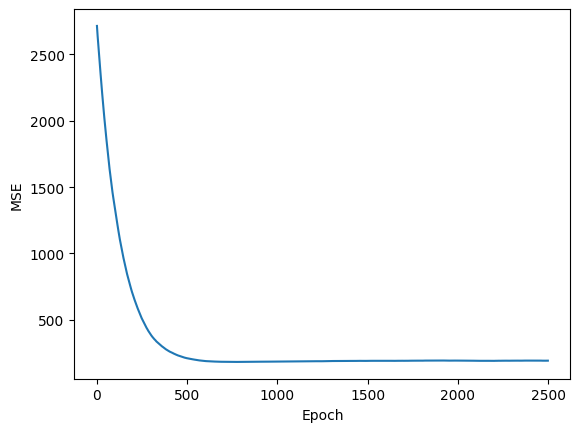

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

index = []
i = 0
for items in range(len(MSEresults)):
  index.append(i)
  i = i + 1
print('Average Percent Error:', MAPE(yTest, predictY(weights, xTest, intercept)))
print('Average Error:', MAE(yTest, predictY(weights, xTest, intercept)))
print('Average Error, Each Error Squared:', MSE(yTest, predictY(weights, xTest, intercept)))
print('MSE Square Rooted:', RMSE(yTest, predictY(weights, xTest, intercept)))


plt.plot(index, MSEresults)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.show()

In [ ]:
# testing
# print(predictY(weights, nba['Dallas Mavericks'], intercept))
print(nbaWinsTest['Philadelphia 76ers'])
print("Philadelphia 76ers:", predictY(weights, nbaTest['Philadelphia 76ers'], intercept))
print("loss: ", loss(yTest, predictY(weights,xTest,intercept)))
model.predict(nbaTest['Philadelphia 76ers'])

[0.634, 0.622]
Philadelphia 76ers: [0.6016962841837443, 0.5983792691995058]
loss:  0.010933470646681117


array([0.61980414, 0.67322457])

In [ ]:
# testing
# print(predictY(weights, nba['Dallas Mavericks'], intercept))
print(nbaWinsTest['Golden State Warriors'])
print('Golden State Warriors', predictY(weights, nbaTest['Golden State Warriors'], intercept))
print("loss: ", loss(yTest, predictY(weights,xTest,intercept)))
model.predict(nbaTest['Golden State Warriors'])

[70.7, 69.5]
Golden State Warriors [57.863228673398325, 58.403897786138664]
loss:  96.6396052313999


array([82.40800289, 86.90503172])